# Bayesian Monthly Sensitivity Model

In [1]:
import pandas as pd
import pylab as plt
import numpy as np
import seaborn as sns
import nest_asyncio
nest_asyncio.apply()
import stan


%matplotlib inline

In [2]:
states=['Indiana','Illinois']

In [3]:
temp_states=[]
for i,s in enumerate(states):
    maize_temp=pd.read_table('./Crop_data_files/maize_met_anoms/Maize_Spring_USA_'+s+'_temp_anom_real.csv')
    maize_temp.rename(columns = {'Unnamed: 0':'Year'}, inplace = True)
    temp_states.append(maize_temp)
temp_states=pd.concat(temp_states,keys=states)

In [7]:
# Compile model
with open('stan/BMSM-simp.stan', 'r') as f:
    model = f.read()
# sm = stan.build(f, data=data)


In [9]:
yields=pd.read_table('./Crop_data_files/Maize_median_yield_anoms.csv')

In [10]:
n_years=np.array(yields[yields['Region']=='Maize_Spring_USA_Indiana'].iloc[0,22:]).size
data={
    'n_regions':2,
    'n_years':n_years,
    'd_temp':np.array(temp_states.iloc[:,1:]).reshape(len(states),int(np.array(temp_states.iloc[:,1:]).shape[0]/len(states)),12),
    'd_yields':np.array(yields[yields["Region"].isin(['Maize_Spring_USA_'+s for s in states])].iloc[:,22:]).astype(float)
}

In [12]:
sm = stan.build(model, data=data)

Building...



Building: found in cache, done.Messages from stanc:
Warning in '/var/folders/m7/fqkk2h3d5rlbg6_z4yfy3dc4000z5d/T/httpstan_8ls7lxt3/model_2wdzshqy.stan', line 28, column 24: Argument 100.0 suggests there may be parameters that are not unit scale; consider rescaling with a multiplier (see manual section 22.12).


In [69]:
type(sm)

stan.model.Model

In [67]:
fit=sm.sample(num_chains=4,num_samples=1000)
type(fit)

Sampling:   0%
Sampling:   2% (200/8000)
Sampling:   6% (500/8000)
Sampling:  10% (800/8000)
Sampling:  15% (1200/8000)
Sampling:  24% (1900/8000)
Sampling:  45% (3600/8000)
Sampling:  66% (5300/8000)
Sampling:  86% (6900/8000)
Sampling: 100% (8000/8000)
Sampling: 100% (8000/8000), done.
Messages received during sampling:
  Gradient evaluation took 6.7e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.67 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 7e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.7 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000122 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.22 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 9.3e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.93 seconds.
  Adjust your expectations accordingly!


stan.fit.Fit

In [14]:
df = fit.to_frame()
df.describe().T

,count,mean,std,min,25%,50%,75%,max
parameters,,,,,,,,
lp__,4000.0,-29.718759,3.479939,-46.835168,-31.860716,-29.384142,-27.215114,-20.794067
accept_stat__,4000.0,0.880682,0.111157,0.348934,0.817961,0.911959,0.971458,1.000000
stepsize__,4000.0,0.427615,0.021518,0.395795,0.414307,0.431871,0.445180,0.450923
treedepth__,4000.0,3.221750,0.416077,2.000000,3.000000,3.000000,3.000000,4.000000
n_leapfrog__,4000.0,10.499000,4.140203,3.000000,7.000000,7.000000,15.000000,31.000000
...,...,...,...,...,...,...,...,...
d_yields_pred.1.34,4000.0,0.723408,1.087181,-3.011033,0.020792,0.721664,1.449657,4.359585
d_yields_pred.2.34,4000.0,0.909879,1.090470,-2.837623,0.167443,0.892372,1.646489,5.009208
d_yields_pred.1.35,4000.0,1.299202,1.181535,-2.729198,0.503752,1.286917,2.079207,5.820316


In [136]:
list(df.columns)

['lp__',
 'accept_stat__',
 'stepsize__',
 'treedepth__',
 'n_leapfrog__',
 'divergent__',
 'energy__',
 's_temp.1.1',
 's_temp.2.1',
 's_temp.1.2',
 's_temp.2.2',
 's_temp.1.3',
 's_temp.2.3',
 's_temp.1.4',
 's_temp.2.4',
 's_temp.1.5',
 's_temp.2.5',
 's_temp.1.6',
 's_temp.2.6',
 's_temp.1.7',
 's_temp.2.7',
 's_temp.1.8',
 's_temp.2.8',
 's_temp.1.9',
 's_temp.2.9',
 's_temp.1.10',
 's_temp.2.10',
 's_temp.1.11',
 's_temp.2.11',
 's_temp.1.12',
 's_temp.2.12',
 'd_yields_pred.1.1',
 'd_yields_pred.2.1',
 'd_yields_pred.1.2',
 'd_yields_pred.2.2',
 'd_yields_pred.1.3',
 'd_yields_pred.2.3',
 'd_yields_pred.1.4',
 'd_yields_pred.2.4',
 'd_yields_pred.1.5',
 'd_yields_pred.2.5',
 'd_yields_pred.1.6',
 'd_yields_pred.2.6',
 'd_yields_pred.1.7',
 'd_yields_pred.2.7',
 'd_yields_pred.1.8',
 'd_yields_pred.2.8',
 'd_yields_pred.1.9',
 'd_yields_pred.2.9',
 'd_yields_pred.1.10',
 'd_yields_pred.2.10',
 'd_yields_pred.1.11',
 'd_yields_pred.2.11',
 'd_yields_pred.1.12',
 'd_yields_pred.2.1

In [61]:
fit.keys()
# sampler_params = fit['d_yields_pred']
# where has d_yields gone?

KeysView(<stan.Fit>
Parameters:
    s_temp: (2, 12)
    d_yields_pred: (2, 35)
    tmp: ()
Draws: 4000)

In [42]:
fit['d_yields_pred']

array([[[-0.98593507, -1.33768474, -1.45830375, ..., -0.6493943 ,
         -0.89613995, -2.70699696],
        [ 1.27761076,  0.91148607,  1.43223852, ..., -1.20563226,
          1.43615014, -0.05384284],
        [ 0.20627047,  1.61155743,  1.23307112, ...,  1.68668285,
          1.88846857, -0.28262453],
        ...,
        [-1.81848342, -1.73349719, -1.69937996, ..., -2.68528949,
         -1.65105329, -0.32007785],
        [ 0.81151815, -0.44414923, -0.67691727, ...,  0.51679531,
          0.89800672,  2.00847068],
        [ 1.89022849,  1.17249434,  4.26654531, ..., -0.15248501,
          1.4551878 ,  0.41186138]],

       [[-1.55017307, -1.94312794, -1.23778382, ..., -0.20616333,
         -1.22565822,  0.12284952],
        [ 0.76127538, -1.88388814,  1.13115739, ...,  0.23386068,
          1.46479062,  0.10380111],
        [-0.01518113,  1.72857104,  1.14648021, ..., -0.48478462,
          0.11778813, -0.31793727],
        ...,
        [-1.25585888,  0.02701543, -3.50748558, ..., -

In [41]:
dir(fit)

['__abstractmethods__',
 '__class__',
 '__class_getitem__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_draws',
 '_parameter_indexes',
 'constrained_param_names',
 'dims',
 'get',
 'items',
 'keys',
 'num_chains',
 'num_samples',
 'num_thin',
 'num_warmup',
 'param_names',
 'sample_and_sampler_param_names',
 'save_warmup',
 'stan_outputs',
 'to_frame',
 'values']

In [137]:
fit.sample_and_sampler_param_names

('lp__',
 'accept_stat__',
 'stepsize__',
 'treedepth__',
 'n_leapfrog__',
 'divergent__',
 'energy__')

In [138]:
fit.param_names

('s_temp', 'd_yields_pred', 'tmp')

In [161]:
x= fit['treedepth__']
for y in x:
    print(sum(x)>0) # [ True  True  True ...  True  True  True]


[ True  True  True ...  True  True  True]


In [196]:
# from https://github.com/grburgess/stan_utility/blob/master/stan_utility/utils.py
def check_div(fit, quiet=False):
    """Check transitions that ended with a divergence"""
    # sampler_params = fit.sample_and_sampler_param_names
    # divergent = [x for y in sampler_params for x in y["divergent__"]]
    divergent = fit["divergent__"][0]
    n = sum(divergent)
    N = len(divergent)

    if not quiet and n > 0:
        print(
            "{} of {} iterations ended with a divergence ({}%)".format(
                n, N, 100 * n / N
            )
        )
        # return 'jokes'

    if n > 0:
        if not quiet:
            print("  Try running with larger adapt_delta to remove the divergences")
            # return 'here'
        else:
            return False
    else:
        if quiet:
            return True
        # else:
        #     return 'silly'


def check_treedepth(fit, max_treedepth=10, quiet=False):
    """Check transitions that ended prematurely due to maximum tree depth limit"""
    # depths = [x for y in sampler_params for x in y["treedepth__"]]
    depths = fit['treedepth__'][0]
    n = sum(1 for x in depths if x == max_treedepth)
    N = len(depths)

    if not quiet and n > 0:
        print(
            (
                "{} of {} iterations saturated the maximum tree depth of {}" + " ({}%)"
            ).format(n, N, max_treedepth, 100 * n / N)
        )
    if n > 0:
        if not quiet:
            print(
                "  Run again with max_treedepth set to a larger value to avoid saturation"
            )
        else:
            return False
    else:
        if quiet:
            return True


def check_energy(fit, quiet=False):
    """Checks the energy fraction of missing information (E-FMI)"""
    # sampler_params = fit
    no_warning = True
    for chain_num, energies in enumerate(fit['energy__']):
        # energies = s["energy__"]
        numer = sum(
            (energies[i] - energies[i - 1]) ** 2 for i in range(1, len(energies))
        ) / len(energies)
        denom = np.var(energies)
        if numer / denom < 0.2:
            if not quiet:
                print("Chain {}: E-BFMI = {}".format(chain_num, numer / denom))
            no_warning = False

    if no_warning:
        if quiet:
            return True
    else:
        if not quiet:
            print(
                "  E-BFMI below 0.2 indicates you may need to reparameterize your model"
            )
        else:
            return False


In [198]:
# carry out some diagnostic checks on fit
# import stan_utility
check_div(fit)
check_energy(fit)
check_treedepth(fit)

In [79]:
fit.keys

<bound method Mapping.keys of <stan.Fit>
Parameters:
    s_temp: (2, 12)
    d_yields_pred: (2, 35)
    tmp: ()
Draws: 4000>

In [65]:
posterior = stan.build(model, data=data, random_seed=5)
fit = posterior.sample(num_chains=4, num_samples=150)

Building...



Building: found in cache, done.Messages from stanc:
Warning in '/var/folders/m7/fqkk2h3d5rlbg6_z4yfy3dc4000z5d/T/httpstan_8ls7lxt3/model_2wdzshqy.stan', line 28, column 24: Argument 100.0 suggests there may be parameters that are not unit scale; consider rescaling with a multiplier (see manual section 22.12).
Sampling:   0%
Sampling:   2% (100/4600)
Sampling:   7% (300/4600)
Sampling:  11% (500/4600)
Sampling:  17% (800/4600)
Sampling:  33% (1500/4600)
Sampling:  48% (2200/4600)
Sampling:  68% (3150/4600)
Sampling:  87% (4000/4600)
Sampling:  95% (4350/4600)
Sampling: 100% (4600/4600)
Sampling: 100% (4600/4600), done.
Messages received during sampling:
  Gradient evaluation took 6.6e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.66 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 5.7e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.57 seconds.
  Adjust your expectations accordingly!
  Grad

In [68]:
fit.keys()

KeysView(<stan.Fit>
Parameters:
    s_temp: (2, 12)
    d_yields_pred: (2, 35)
    tmp: ()
Draws: 4000)

In [118]:
# fit['s_temp'].shape # (2, 12, 4000)
fit['s_temp'].T.shape # (4000, 12, 2)
fit['d_yields_pred'].shape # (2, 35, 4000)

(2, 35, 4000)

In [127]:

{k:v for k,v in fit.items()}.keys()

dict_keys(['s_temp', 'd_yields_pred', 'tmp'])

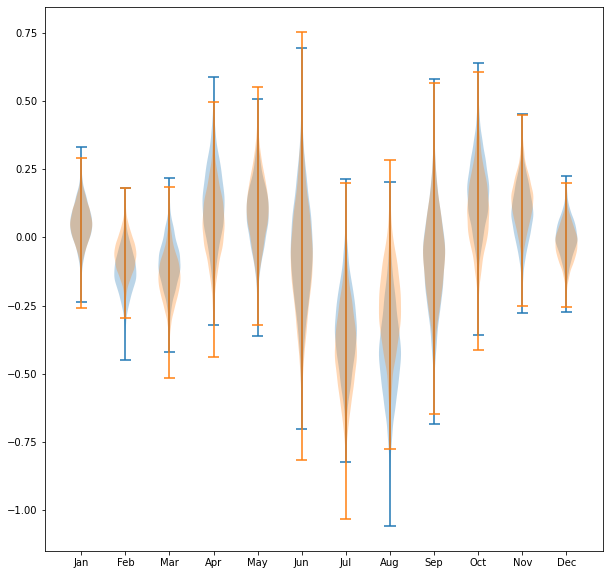

In [204]:
# changes samples to fit (shape 35,4000) not right
plt.figure(figsize=(10,10))
# plt.violinplot(fit['s_temp'].T[:,0,:]);
plt.violinplot(fit['s_temp'].T[:,:,0]);
# plt.violinplot(fit['s_temp'].T[:,1,:]);
plt.violinplot(fit['s_temp'].T[:,:,1]);
plt.xticks(range(1,13),maize_temp.columns[1:]);


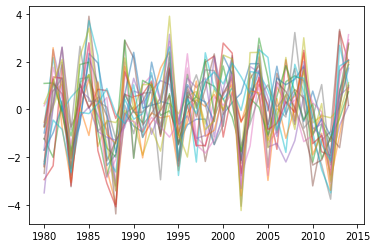

In [123]:
for s in range(0,2000,100):
    plt.plot(range(1980,2015),fit['d_yields_pred'].T[s,:,0].T,alpha=0.5)

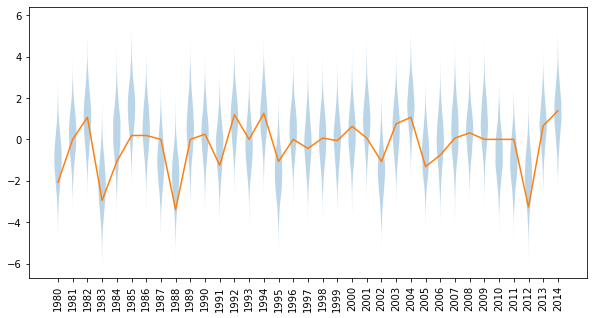

In [133]:
plt.figure(figsize=(10,5))
# plt.violinplot(fit['d_yields_pred'][:,0,:].T,showextrema=False); transpose the d_yields_pred and change the slice (0 to the end because thats where the index is only 2)
plt.violinplot(fit['d_yields_pred'].T[:,:,0],showextrema=False);
plt.xticks(range(1,36),np.arange(1980,2015),rotation=90);
plt.plot(range(1,36),data['d_yields'][0,:])


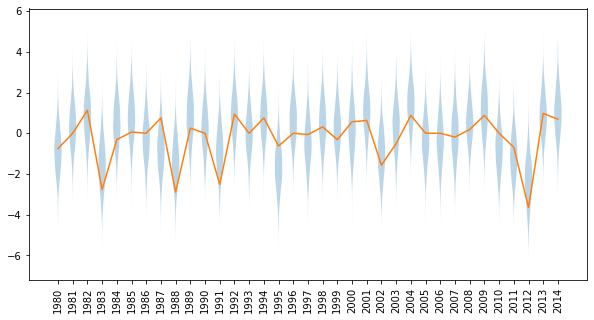

In [134]:
# Copy from above to get the y axis right 5 - 20, not -6 t 6
plt.figure(figsize=(10,5))
plt.violinplot(fit['d_yields_pred'].T[:,:,1],showextrema=False);
plt.xticks(range(1,36),np.arange(1980,2015),rotation=90);
plt.plot(range(1,36),data['d_yields'][1,:])


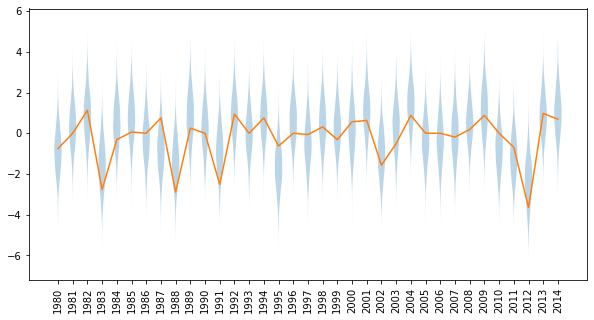

In [134]:
plt.figure(figsize=(10,5))
plt.violinplot(fit['d_yields_pred'].T[:,:,1],showextrema=False);
plt.xticks(range(1,36),np.arange(1980,2015),rotation=90);
plt.plot(range(1,36),data['d_yields'][1,:])


In [99]:
type(data['d_yields'])

numpy.ndarray

In [100]:
data['d_yields'].shape

(2, 35)